In [142]:
import platform
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import *
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_theme(style="ticks", palette="pastel")
if platform.system() == 'Windows':
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
else:  # Mac or other systems
    plt.rcParams['font.family'] = ['Arial Unicode MS']

# preprocess and load data
filepath = 'train_data.pkl'
if not os.path.exists(filepath):
    general_process(output_filepath=filepath)
with open(filepath, 'rb') as fin:
    df = pickle.load(fin)
    pip install scikit-posthocs

In [143]:
df['flux_density_max'] = df['flux_density'].apply(lambda r: np.max(r))

In [144]:
df

,type_material,temp,freq,core_loss,type_waveform,flux_density,flux_density_max
0,1,25,50030,1997.955250,正弦波,"[0.000212759, 0.000389496, 0.00056608, 0.00074...",0.028849
1,1,25,50020,2427.749830,正弦波,"[-0.000550883, -0.000357918, -0.000165251, 2.7...",0.031419
2,1,25,50020,3332.725760,正弦波,"[-0.003779509, -0.003563773, -0.003348945, -0....",0.035535
3,1,25,50020,4502.908007,正弦波,"[-0.000510932, -0.000266662, -2.25e-05, 0.0002...",0.040015
4,1,25,50030,6063.023248,正弦波,"[0.000457688, 0.000732427, 0.00100655, 0.00128...",0.045028
...,...,...,...,...,...,...,...
12395,4,90,199190,20604.900210,梯形波,"[-0.017758287, -0.017339198, -0.016932051, -0....",0.034867
12396,4,90,199190,26504.284280,梯形波,"[-0.019690471, -0.019226928, -0.018775593, -0....",0.038341
12397,4,90,199190,46232.491530,梯形波,"[-0.024998103, -0.024410702, -0.02383819, -0.0...",0.048877
12398,4,90,199190,61458.085900,梯形波,"[-0.027987528, -0.027328599, -0.026686789, -0....",0.054889


In [217]:
df['flux_density_max'].min()


0.00963815

1.单因素方差分析

温度

<Axes: xlabel='temp', ylabel='core_loss'>

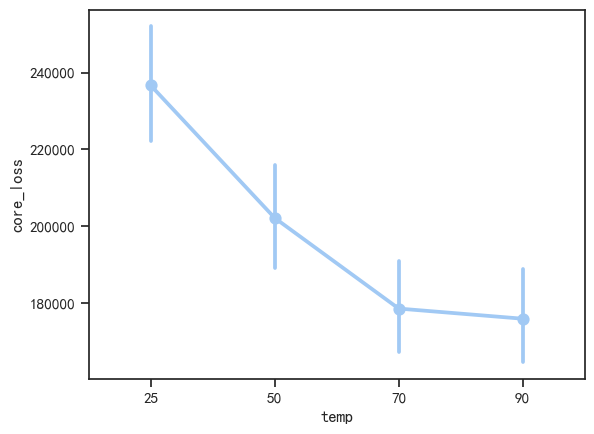

In [204]:
import seaborn as  sns
sns.pointplot(x=df['temp'],y=df['core_loss'])    

In [223]:
#拟合公式
from statsmodels.formula.api import ols
model1=ols('core_loss~temp',data=df).fit()
#model1.summary() 二选一
#标准输出
from statsmodels.stats.anova import anova_lm
anova_lm(model1)



,df,sum_sq,mean_sq,F,PR(>F)
temp,1.0,6.917689e+12,6.917689e+12,49.034601,2.644635e-12
Residual,12398.0,1.749082e+15,1.410777e+11,NaN,NaN


In [228]:
#事后检验
import scikit_posthocs as sp
posthoc1=sp.posthoc_ttest(df, val_col='core_loss', group_col='temp', p_adjust='bonferroni')
posthoc1


,25,50,70,90
25,1.000000e+00,0.004935,2.821551e-08,5.611768e-09
50,4.934604e-03,1.000000,5.963027e-02,2.526206e-02
70,2.821551e-08,0.059630,1.000000e+00,1.000000e+00
90,5.611768e-09,0.025262,1.000000e+00,1.000000e+00


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1d082970740>)

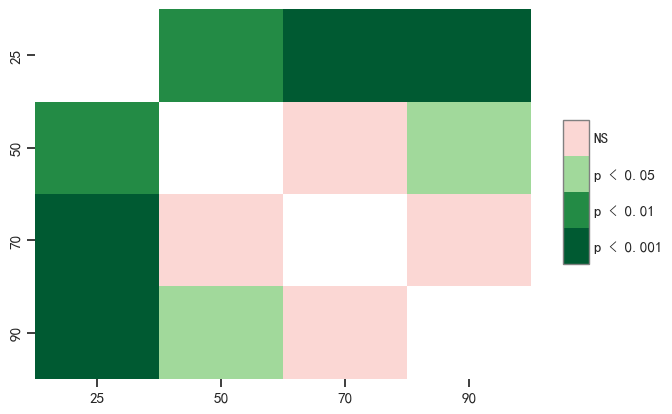

In [219]:
sp.sign_plot(posthoc)


波形

<Axes: xlabel='type_waveform', ylabel='core_loss'>

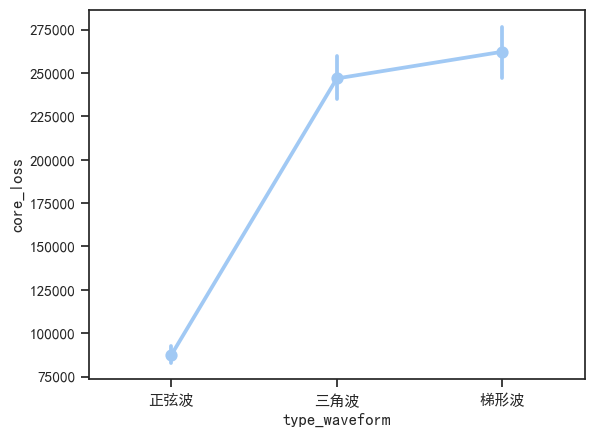

In [224]:
sns.pointplot(x=df['type_waveform'],y=df['core_loss'])

In [226]:
#拟合公式
from statsmodels.formula.api import ols
model2=ols('core_loss~type_waveform',data=df).fit()
#model1.summary() 二选一
#标准输出
from statsmodels.stats.anova import anova_lm
anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
type_waveform,2.0,7.520255e+13,3.760128e+13,277.334572,1.485398e-118
Residual,12397.0,1.680797e+15,1.355809e+11,NaN,NaN


In [230]:
posthoc2=sp.posthoc_ttest(df, val_col='core_loss', group_col='type_waveform', p_adjust='bonferroni')
posthoc2


,正弦波,三角波,梯形波
正弦波,1.000000e+00,9.543892e-107,3.491700e-119
三角波,9.543892e-107,1.000000e+00,3.416046e-01
梯形波,3.491700e-119,3.416046e-01,1.000000e+00


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1d12242e450>)

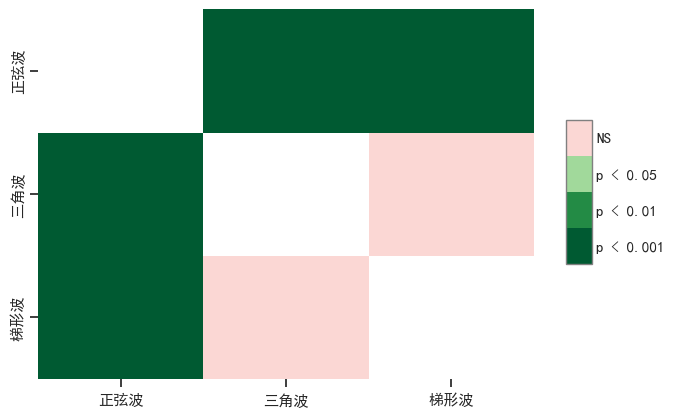

In [231]:
sp.sign_plot(posthoc2)

材料



<Axes: xlabel='type_material', ylabel='core_loss'>

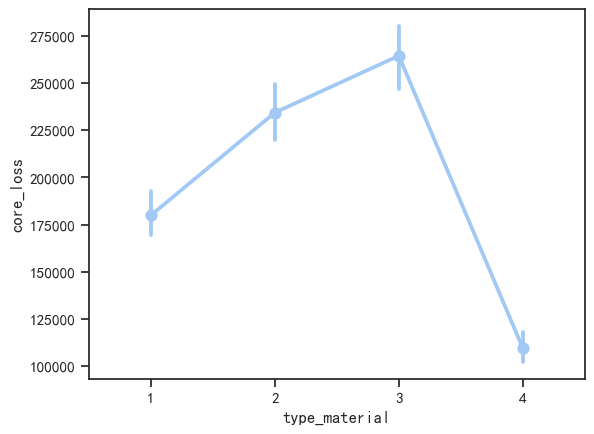

In [233]:
sns.pointplot(x=df['type_material'],y=df['core_loss'])

    

In [234]:
#拟合公式
from statsmodels.formula.api import ols
model3=ols('core_loss~type_material',data=df).fit()
#model1.summary() 二选一
#标准输出
from statsmodels.stats.anova import anova_lm
anova_lm(model3)
    

,df,sum_sq,mean_sq,F,PR(>F)
type_material,3.0,4.113720e+13,1.371240e+13,99.121035,2.116712e-63
Residual,12396.0,1.714862e+15,1.383399e+11,NaN,NaN


In [236]:
posthoc3=sp.posthoc_ttest(df, val_col='core_loss', group_col='type_material', p_adjust='bonferroni')
posthoc3


,1,2,3,4
1,1.000000e+00,3.838859e-08,1.836600e-16,1.353317e-20
2,3.838859e-08,1.000000e+00,4.163444e-02,1.585768e-45
3,1.836600e-16,4.163444e-02,1.000000e+00,6.168315e-57
4,1.353317e-20,1.585768e-45,6.168315e-57,1.000000e+00


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1d16285a8d0>)

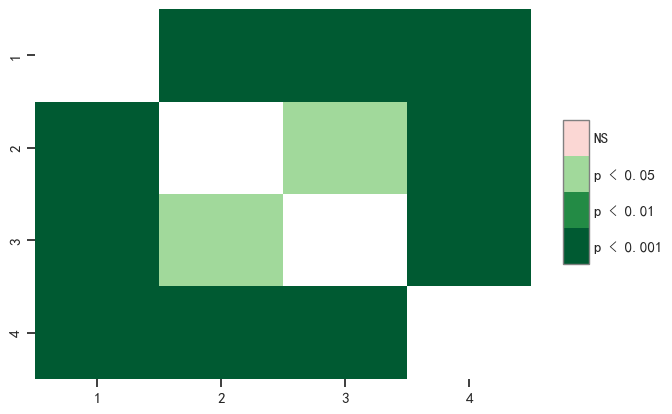

In [237]:
sp.sign_plot(posthoc3)

双因素方差分析

温度和材料

In [238]:
model = ols('core_loss ~ C(temp) + C(type_material) + C(temp):C(type_material)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

                               df        sum_sq       mean_sq          F  \
C(temp)                       3.0  7.513337e+12  2.504446e+12  18.170410   
C(type_material)              3.0  4.074941e+13  1.358314e+13  98.549228   
C(temp):C(type_material)      9.0  8.374721e+11  9.305246e+10   0.675120   
Residual                  12384.0  1.706899e+15  1.378310e+11        NaN   

                                PR(>F)  
C(temp)                   9.247517e-12  
C(type_material)          4.886014e-63  
C(temp):C(type_material)  7.322576e-01  
Residual                           NaN  


温度和波形

In [239]:

model = ols('core_loss ~ C(temp) + C(type_waveform) + C(temp):C(type_waveform)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

                               df        sum_sq       mean_sq           F  \
C(temp)                       3.0  7.513337e+12  2.504446e+12   18.581496   
C(type_waveform)              2.0  7.677357e+13  3.838679e+13  284.807116   
C(temp):C(type_waveform)      6.0  2.036619e+12  3.394365e+11    2.518417   
Residual                  12388.0  1.669676e+15  1.347817e+11         NaN   

                                 PR(>F)  
C(temp)                    5.059109e-12  
C(type_waveform)          1.172941e-121  
C(temp):C(type_waveform)   1.946509e-02  
Residual                            NaN  


材料和波形


In [240]:
model = ols('core_loss ~ C(type_material) + C(type_waveform) + C(type_material):C(type_waveform)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

                                        df        sum_sq       mean_sq  \
C(type_material)                       3.0  4.113720e+13  1.371240e+13   
C(type_waveform)                       2.0  7.697475e+13  3.848737e+13   
C(type_material):C(type_waveform)      6.0  1.188392e+13  1.980653e+12   
Residual                           12388.0  1.626003e+15  1.312563e+11   

                                            F         PR(>F)  
C(type_material)                   104.470387   8.634886e-67  
C(type_waveform)                   293.223002  3.777832e-125  
C(type_material):C(type_waveform)   15.089962   2.720745e-17  
Residual                                  NaN            NaN  


多因素方差分析

In [241]:
model = ols('core_loss ~ C(temp) + C(type_waveform) + C(type_material) + C(temp):C(type_waveform) + C(temp):C(type_material) + C(type_waveform):C(type_material)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

                                        df        sum_sq       mean_sq  \
C(temp)                                3.0  7.513337e+12  2.504446e+12   
C(type_waveform)                       2.0  7.677357e+13  3.838679e+13   
C(type_material)                       3.0  4.222678e+13  1.407559e+13   
C(temp):C(type_waveform)               6.0  1.877707e+12  3.129512e+11   
C(temp):C(type_material)               9.0  9.309102e+11  1.034345e+11   
C(type_waveform):C(type_material)      6.0  1.224392e+13  2.040653e+12   
Residual                           12370.0  1.614433e+15  1.305120e+11   

                                            F         PR(>F)  
C(temp)                             19.189395   2.073150e-12  
C(type_waveform)                   294.124661  1.612616e-125  
C(type_material)                   107.849070   6.286165e-69  
C(temp):C(type_waveform)             2.397873   2.565599e-02  
C(temp):C(type_material)             0.792529   6.233036e-01  
C(type_waveform):C(type_mater